In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
img1 = cv2.imread('/content/gdrive/My Drive/Colab IP/Images/lena.jpg')

In [4]:
RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [5]:
R_img1,G_img1,B_img1 = cv2.split(RGB_img1)

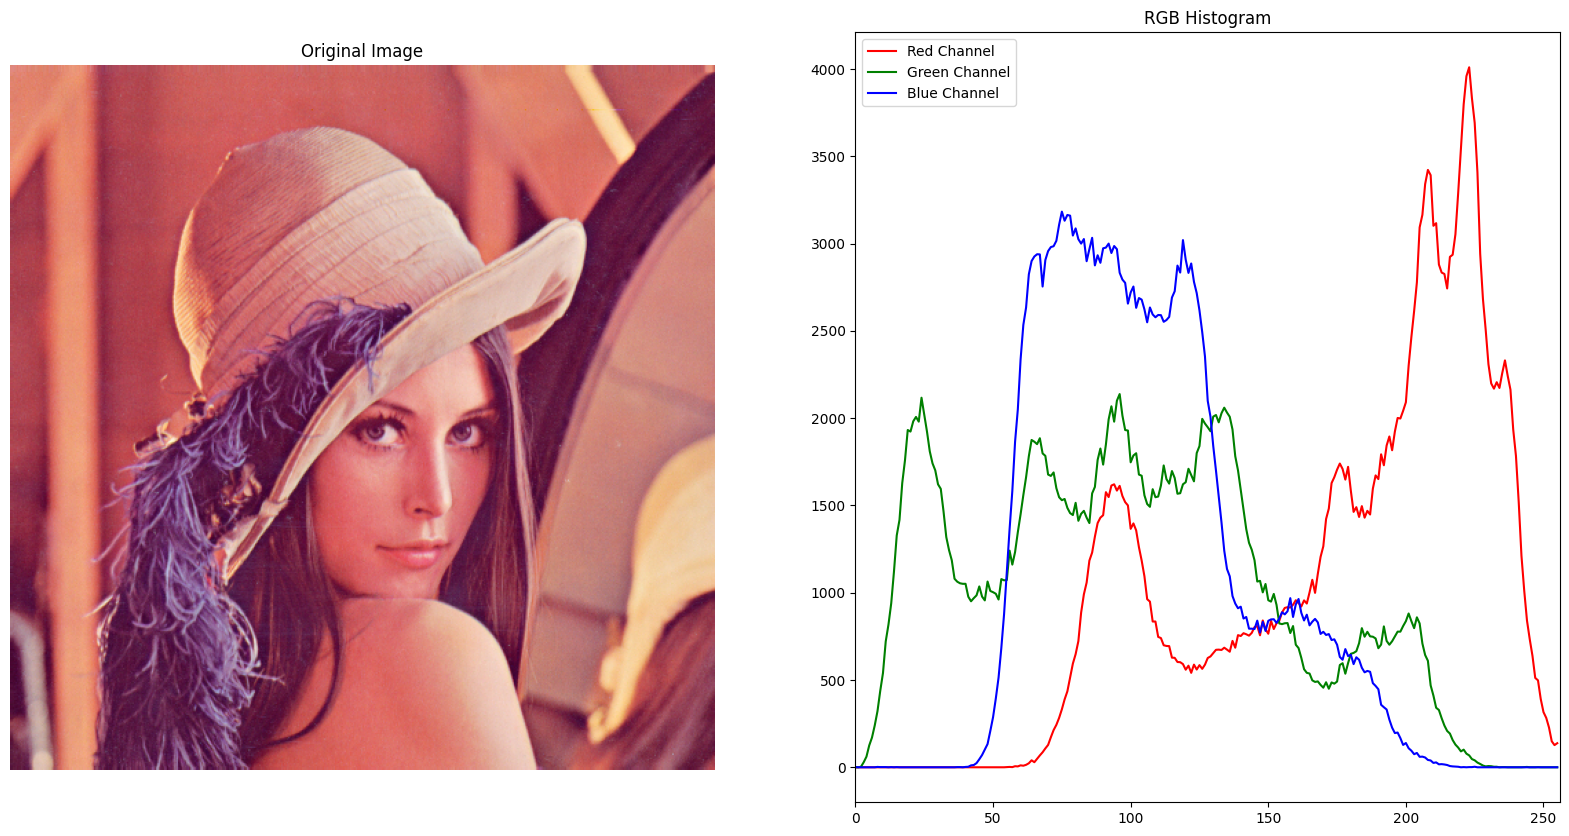

In [7]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(RGB_img1)
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 2, 2)
hist_r = cv2.calcHist([R_img1], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([G_img1], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([B_img1], [0], None, [256], [0, 256])

plt.plot(hist_r, color='r', label="Red Channel")
plt.plot(hist_g, color='g', label="Green Channel")
plt.plot(hist_b, color='b', label="Blue Channel")
plt.xlim([0, 256])
plt.legend()
plt.title("RGB Histogram")

plt.show()

In [8]:
img1 = cv2.imread('/content/gdrive/My Drive/Colab IP/Images/cell.bmp')

In [9]:
RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
output_img = np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]))

In [10]:
for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    if(np.int32(RGB_img1[h,w][0])<140):
      output_img[h,w]=255
    else:
      output_img[h,w]=0

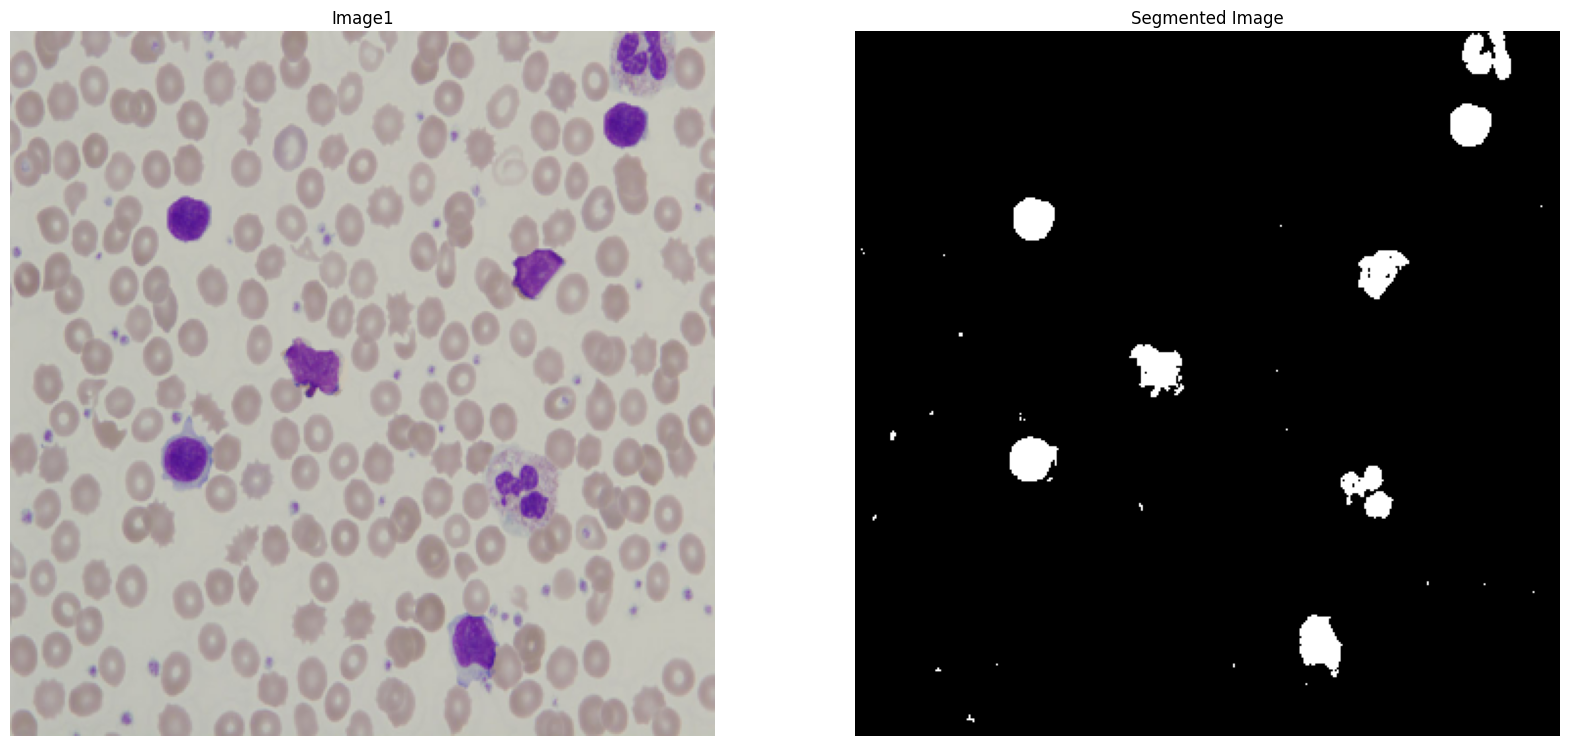

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("Image1")
plt.imshow(RGB_img1)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Segmented Image")
plt.imshow(output_img, cmap='gray')
plt.axis("off")
plt.show()

In [12]:
img = cv2.imread('/content/gdrive/My Drive/Colab IP/Images/milkdrop.bmp')

In [13]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [14]:
T1=50
T2=0
T0=1

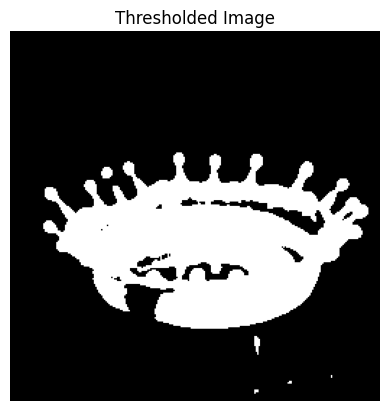

In [20]:
output_img = np.zeros((gray_img.shape[0], gray_img.shape[1]))

def threshold_update(img, output_img, T1):
    sum1 = 0
    count1 = 1
    sum2 = 0
    count2 = 1
    for h in range(img.shape[0]):
        for w in range(img.shape[1]):
            if output_img[h, w] == 255:
                sum1 += img[h, w]
                count1 += 1
            else:
                sum2 += img[h, w]
                count2 += 1
    ave1 = sum1 / count1
    ave2 = sum2 / count2
    T2 = int((ave1 + ave2) / 2)
    return T2

for h in range(gray_img.shape[0]):
    for w in range(gray_img.shape[1]):
        if gray_img[h, w] > T1:
            output_img[h, w] = 255
        else:
            output_img[h, w] = 0


while abs(T1 - T2) > T0:
    T1 = T2
    T2 = threshold_update(gray_img, output_img, T1)


    for h in range(gray_img.shape[0]):
        for w in range(gray_img.shape[1]):
            if gray_img[h, w] > T2:
                output_img[h, w] = 255
            else:
                output_img[h, w] = 0

plt.imshow(output_img, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")
plt.show()